In [1]:
# LIBRERIAS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import AdaBoostClassifier 
# ------------------
# Pipeline
from sklearn.pipeline import Pipeline
# ------------------
# Métricas de validación
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# ------------------
# GridSearch
from sklearn.model_selection import GridSearchCV
# ------------------
# Balanceo
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
# ------------------
# Otras
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# ------------------
# Pickle
import pickle

In [2]:
# Cargar datos Train y Test
X_train = pd.read_csv('data/X_train.csv',index_col=0)
y_train = pd.read_csv('data/y_train.csv',index_col=0)
X_test = pd.read_csv('data/X_test.csv',index_col=0)
y_test = pd.read_csv('data/y_test.csv',index_col=0)

# Cargar Modelo
with open('my_model.model', "rb") as archivo_entrada:
    my_model = pickle.load(archivo_entrada)    
print(my_model)

Pipeline(steps=[('scaler', StandardScaler()), ('kbest', SelectKBest()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.4, max_depth=6))])


In [3]:
best_model = my_model.fit(X_train, y_train)

c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score 0.9408825978351374 
 --------------------------------------------------
Confusion Matrix 
 [[591  10]
 [ 61 539]] 
 --------------------------------------------------


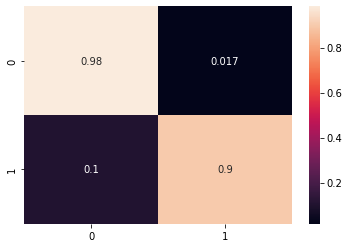

In [4]:
# PREDICCIÓN
y_pred = best_model.predict(X_test)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

In [5]:
# Guardar modelo
time = pd.Timestamp.now().strftime('%Y-%m-%d-%H-%M') 
name = "model_" + time

with open(name, "wb") as archivo_salida:
    pickle.dump(best_model, archivo_salida)

In [6]:
# Cargar Modelo
# with open('model_2022-09-14-08-19', "rb") as archivo_entrada:
#     my_model = pickle.load(archivo_entrada)    
# print(my_model)